In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pennylane as qml

import math

from pennylane.optimize import AdamOptimizer

In [9]:

# Variables for the PDE
num_variables = int(input("Enter the number of variables for the PDE: "))
all_variable_orders = []
all_variable_coefficients = []
variable_names = []
variable_indices = []
variable_values = {}

# varible names, their order of differentiation, and coefficients of those variables's derivatives
for i in range(num_variables):
    variable_name = input(f"Enter the name for variable {i + 1}: ")
    variable_names.append(variable_name)
    variable_indices.append(i)
    num_orders = int(input(f"Enter the number of derivatives for variable {variable_name}: "))
    orders = []
    coefficients = []

    print(f"Variable: {variable_name}")
    for j in range(num_orders):
        order = int(input(f"Enter the order for derivative {j + 1} with respect to {variable_name}: "))
        coefficient = input(f"Enter the coefficient for derivative {j + 1} with respect to {variable_name} (as a function of {variable_name}): ")
        orders.append(order)
        coefficients.append(coefficient)

    # To get the range values of variables
    low_value = float(input(f"Enter the low value for variable {variable_name}: "))
    high_value = float(input(f"Enter the high value for variable {variable_name}: "))
    # Discretizing the range with certain step size value
    step_size = float(input(f"Enter the step size for generating random numbers for variable {variable_name}: "))

    random_values = np.linspace(low_value, high_value, int((high_value - low_value) / step_size) + 1)
    print(f"Values for {variable_name}:")
    for value in random_values:
        print(value)

    all_variable_orders.append(orders)
    all_variable_coefficients.append(coefficients)
    variable_values[variable_name] = random_values.tolist()  

# Collect terms that are not derivatives in the PDE(e.g., u**2, sin(u), u, etc....)
non_derivative_terms = []
add_non_derivative_terms = input("Are there any non-derivative terms? type (yes/no): ").strip().lower()

while add_non_derivative_terms == "yes":
    term = input("Enter the non-derivative term : ")
    non_derivative_terms.append(term)
    add_non_derivative_terms = input("Is there any more non-derivative terms? (yes/no): ").strip().lower()

# To print all info;
print("Variable Names:", variable_names)
print("Variable Values:", variable_values)
print("Variable Orders:", all_variable_orders)
print("Variable Coefficients:", all_variable_coefficients)
print("Non-Derivative Terms:", non_derivative_terms)

# To construct the PDE expression
def construct_pde_expression(variable_names, all_variable_orders, all_variable_coefficients, non_derivative_terms):
    pde_expression = ""
    
    for i, (variable_name, orders, coefficients) in enumerate(zip(variable_names, all_variable_orders, all_variable_coefficients)):
        for order, coeff in zip(orders, coefficients):
            if "lambda" in coeff:  
                term = f"{coeff}*d^{order}u/d{variable_name}^{order}"
            else:
                term = f"{coeff}*d^{order}u/d{variable_name}^{order}"
            pde_expression += term + " + "

    
    for term in non_derivative_terms:
        pde_expression += term + " + "
    pde_expression = pde_expression[:-3] 
    return pde_expression


pde_expression = construct_pde_expression(variable_names, all_variable_orders, all_variable_coefficients, non_derivative_terms)
print("Constructed PDE:", pde_expression)




Variable: t
Values for t:
0.0
0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.01
0.011
0.012
0.013000000000000001
0.014
0.015
0.016
0.017
0.018000000000000002
0.019
0.02
0.021
0.022
0.023
0.024
0.025
0.026000000000000002
0.027
0.028
0.029
0.03
0.031
0.032
0.033
0.034
0.035
0.036000000000000004
0.037
0.038
0.039
0.04
0.041
0.042
0.043000000000000003
0.044
0.045
0.046
0.047
0.048
0.049
0.05
0.051000000000000004
0.052000000000000005
0.053
0.054
0.055
0.056
0.057
0.058
0.059000000000000004
0.06
0.061
0.062
0.063
0.064
0.065
0.066
0.067
0.068
0.069
0.07
0.07100000000000001
0.07200000000000001
0.073
0.074
0.075
0.076
0.077
0.078
0.079
0.08
0.081
0.082
0.083
0.084
0.085
0.08600000000000001
0.08700000000000001
0.088
0.089
0.09
0.091
0.092
0.093
0.094
0.095
0.096
0.097
0.098
0.099
0.1
0.101
0.10200000000000001
0.10300000000000001
0.10400000000000001
0.105
0.106
0.107
0.108
0.109
0.11
0.111
0.112
0.113
0.114
0.115
0.116
0.117
0.11800000000000001
0.11900000000000001
0.12
0.

In [10]:
#Check
variable_data = [(key, values) for key, values in variable_values.items()]
for variable, values in variable_data:
    print(f"{variable} = {values}")
    # print(int(len(values)))

t = [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.01, 0.011, 0.012, 0.013000000000000001, 0.014, 0.015, 0.016, 0.017, 0.018000000000000002, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026000000000000002, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036000000000000004, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043000000000000003, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05, 0.051000000000000004, 0.052000000000000005, 0.053, 0.054, 0.055, 0.056, 0.057, 0.058, 0.059000000000000004, 0.06, 0.061, 0.062, 0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07, 0.07100000000000001, 0.07200000000000001, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08, 0.081, 0.082, 0.083, 0.084, 0.085, 0.08600000000000001, 0.08700000000000001, 0.088, 0.089, 0.09, 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1, 0.101, 0.10200000000000001, 0.10300000000000001, 0.10400000000000001, 0.105, 0.106, 0.107, 0.108, 0.109, 0.11,

In [14]:



num_qubits = 6
dev = qml.device("default.qubit", wires=num_qubits)
@qml.qnode(dev)
def variational_circuit(params, num_layers, variable_values):

    # feature maps
    for i, value in enumerate(variable_values):
        qml.RY(2 * np.arccos(np.clip(value, -1, 1)), wires=i)

    # paramterized variational circuits
    for layer in range(num_layers):
        for i in range(len(variable_values)):
            qml.RZ(params[layer, i, 0], wires=i)
            qml.RX(params[layer, i, 1], wires=i)
        for i in range(len(variable_values) - 1):
            qml.CNOT(wires=[i, i + 1])

    
    return [qml.expval(qml.PauliZ(i)) for i in range(len(variable_values))]
            
# Function to calculate the cost fucntion
def cost_fn(params, num_layers, variable_values):
    total_cost = 0
    num_iterations = variable_values.shape[1] if len(variable_values.shape) > 1 else variable_values.shape[0]
    for i in range(num_iterations):
        selected_values = variable_values[:, i] if len(variable_values.shape) > 1 else variable_values
        outputs = variational_circuit(params, num_layers, selected_values)
        cost = np.sum(outputs)
        total_cost += cost
    return total_cost

num_layers = 4
# Parameters for the variational circuit
params = np.random.uniform(-np.pi / 2, np.pi / 2, size=(num_layers, num_qubits, 2))

# To choose variables to encode
chosen_variables = input(f"Choose the variables to encode from the list {variable_names} (comma-separated): ")
chosen_variables = [v.strip() for v in chosen_variables.split(',')]
selected_values = np.concatenate([variable_values[v] for v in chosen_variables], axis=0)

# To reshape
selected_values = selected_values.reshape(1, -1)
total_cost = cost_fn(params, num_layers, selected_values)
print(f"Total cost = {total_cost}")
# print(params)


Total cost = 763.5666403287594


In [15]:
# derivative circuit
def compute_derivatives_for_variables(cost_fn, variable_names, variable_values, shift, num_layers, params):
    derivatives = []
    # To select the variables to differentiate
    for variable_to_differentiate in variable_names:
        num_orders = int(input(f"Enter the number of orders for {variable_to_differentiate}: "))
        if num_orders <= 0:
            print("Number of orders must be positive.")
            continue

        for j in range(1, num_orders + 1):
            variable_values_plus = variable_values.copy()
            variable_values_minus = variable_values.copy()

            # To apply the shift n times for the n-th order derivative
            for _ in range(j):
                variable_values_plus[variable_to_differentiate] = [(a + shift) for a in variable_values_plus[variable_to_differentiate]]
                variable_values_minus[variable_to_differentiate] = [(a - shift) for a in variable_values_minus[variable_to_differentiate]]

            # To reshape the variable values to (1, -1)
            variable_values_plus_reshaped = np.array([variable_values_plus[variable_to_differentiate]]).reshape(1, -1)
            variable_values_minus_reshaped = np.array([variable_values_minus[variable_to_differentiate]]).reshape(1, -1)

            # Passing the shifted values to the circuit to get the output (fucntion values) for those set of inputs
            output_plus = cost_fn(params, num_layers, variable_values_plus_reshaped)
            output_minus = cost_fn(params, num_layers, variable_values_minus_reshaped)

            derivative = (output_plus - output_minus) / (2 * shift ** j)
            derivatives.append((variable_to_differentiate, j, derivative))

    return derivatives


In [19]:
shift = 3.14
derivatives = compute_derivatives_for_variables(cost_fn, variable_names, variable_values, shift, num_layers, params)
print(derivatives)
# The first value is the variable, then the order of differentiation, and final value is the derivative

[('t', 1, 0.0), ('t', 2, 0.0), ('x', 1, -4.983751209167451), ('x', 2, 0.0), ('y', 1, -4.983751209167451), ('y', 2, 0.0), ('z', 1, -4.983751209167451), ('z', 2, 0.0)]


In [11]:
# To calculate the PDE value from the fucntion and the derivative values 

def calculate_PDE_from_derivatives(derivatives, variable_names, total_cost):
    print("Derivatives:")
    for derivative in derivatives:
        print(f"Variable: {derivative[0]}, Order: {derivative[1]}, Value: {derivative[2]}")
    
    # To get the number of derivative and non-derivative terms in the PDE expression
    num_derivative_terms = int(input("Enter the number of derivative terms in the PDE: "))
    num_non_derivative_terms = int(input("Enter the number of non-derivative terms in the PDE: "))
    
    PDE_value = 0
    # To get the details of the derivative terms
    for _ in range(num_derivative_terms):
        variable = input(f"Enter variable for the derivative term from the list {variable_names}: ")
        order = int(input(f"Enter the order of the derivative for {variable}: "))
        coefficient_input = input(f"Enter the coefficient for the derivative term with {variable} of order {order} (can be a variable, 'total_cost', or numerical value): ")
        
        # To check if the coefficient of the derivative is the mutliplied by fucntion value(as in non linear PDE) or just a numerical value
        if coefficient_input in variable_names:
            coefficient = float(input(f"Enter value for the variable {coefficient_input}: "))
            
        elif coefficient_input == 'total_cost':
            coefficient = total_cost
        else:
            coefficient = float(coefficient_input)
        selected_derivative = None
        for derivative in derivatives:
            if derivative[0] == variable and derivative[1] == order:
                selected_derivative = derivative[2]
                break
        if selected_derivative is not None:
            PDE_value += coefficient * selected_derivative
        else:
            return f"Derivative value not found for variable {variable} with order {order}."
    
    # To get the non derivative terms in the PDE 

    for _ in range(num_non_derivative_terms):
        coefficient_input = input("Enter the coefficient for the non-derivative term : ") # this can also be a numerical coefficient or the fucntion value itslef
        
        if coefficient_input in variable_names:
            coefficient = float(input(f"Enter value for the variable {coefficient_input}: "))
        elif coefficient_input == 'total_cost':
            coefficient = total_cost
        else:
            coefficient = float(coefficient_input)
        
        non_derivative_expr = input("Enter the expression for the non-derivative term : ")
        variable_used = input("Which variable is used in the expression? Enter the variable name or 'total_cost': ")
        
        variable_values = {var: 0 for var in variable_names}
        if variable_used in variable_names:
            variable_values[variable_used] = float(input(f"Enter value for the variable {variable_used}: "))
        elif variable_used == 'total_cost':
            variable_values['total_cost'] = total_cost
        
        non_derivative_value = eval(non_derivative_expr, {"__builtins__": None}, variable_values)
        PDE_value += coefficient * non_derivative_value
    
    return PDE_value

# Final PDE value
PDE_value = calculate_PDE_from_derivatives(derivatives, variable_names, total_cost)
print(f"PDE value: {PDE_value}")


Derivatives:
Variable: t, Order: 1, Value: -4.978324900230001e-14
Variable: t, Order: 2, Value: -1.585453789882166e-14
Variable: x, Order: 1, Value: -4.978324900230001e-14
Variable: x, Order: 2, Value: -1.585453789882166e-14
Variable: y, Order: 1, Value: -4.978324900230001e-14
Variable: y, Order: 2, Value: -1.585453789882166e-14


PDE value: 4.063340028543018e-11


In [12]:

global initial_condition_values, boundary_condition_values
initial_condition_values = None
boundary_condition_values = None

# To get the initial condition
def handle_initial_condition():
    global initial_condition_values
    print("List of variables:", variable_names)
    variables_in_condition = input("Enter the variables involved in the initial condition separated by commas: ").split(',')
    
    valid_variables = [var.strip() for var in variables_in_condition if var.strip() in variable_names]
    
    if len(valid_variables) == len(variables_in_condition):
        initial_condition_expr = input("Enter the initial condition expression at t=0: ")
        
        variable_values_combinations = [variable_values[var] for var in valid_variables]
        
        try:
            print("Initial Condition Expression:", initial_condition_expr)
            
            initial_condition_values = []
            for values in zip(*variable_values_combinations):
                eval_context = {var: val for var, val in zip(valid_variables, values)}
                eval_context.update({'np': np, 'math': math})
                initial_condition = eval(initial_condition_expr, eval_context)
                initial_condition_values.append(initial_condition)
            
            initial_condition_values = np.array(initial_condition_values)
            return initial_condition_values
        
        except Exception as e:
            print("Invalid expression. Please enter a valid mathematical expression.")
            print(e)
            return None
    else:
        print("Invalid variable selection. Please choose variables from the provided list.")
        return None

# To get the boundary condition
def handle_boundary_conditions():
    global boundary_condition_values
    boundary_condition_values = {}
    
    num_boundary_variables = int(input("Enter the number of variables involved in the boundary condition: "))
    
    if num_boundary_variables == 0:
        boundary_condition_expr = input("Enter the boundary condition value: ")
        boundary_condition_values = float(boundary_condition_expr)
        return boundary_condition_values
    
    variables_in_condition = []
    
    for _ in range(num_boundary_variables):
        variable_name = input(f"Enter the variable name for the boundary condition (from the list {variable_names}): ")
        if variable_name in variable_values:
            variables_in_condition.append(variable_name)
        else:
            print("Invalid variable selection. Please select a variable from the list of variables.")
            return None
    
    boundary_condition_expr = input("Enter the boundary condition expression: ")
    
    for variable_name in variables_in_condition:
        boundary_values = variable_values[variable_name]
        lowest_value = boundary_values[0]
        highest_value = boundary_values[-1]
        
        print(f"Values for variable {variable_name}: ")
        for value in boundary_values:
            print(value)
        
        boundary_type = input(f"Enter the boundary type for {variable_name} (point/range): ")
        
        if boundary_type == 'point':
            boundary_value = lowest_value
        elif boundary_type == 'range':
            lower_boundary_start = float(input(f"Enter the starting value for the lower boundary condition (between {lowest_value} and {highest_value}): "))
            lower_boundary_end = float(input(f"Enter the ending value for the lower boundary condition (between {lowest_value} and {highest_value}): "))
            upper_boundary_start = float(input(f"Enter the starting value for the upper boundary condition (between {lowest_value} and {highest_value}): "))
            upper_boundary_end = float(input(f"Enter the ending value for the upper boundary condition (between {lowest_value} and {highest_value}): "))
        else:
            print("Invalid boundary type. Please enter 'point' or 'range'.")
            return None
        
        try:
            print("Boundary Condition Expression:", boundary_condition_expr)
            print(f"Boundary Variable: {variable_name}")
            
            if boundary_type == 'point':
                print(f"Boundary Value: {boundary_value}")
                boundary_condition_values[variable_name] = boundary_value
            elif boundary_type == 'range':
                print(f"Lower Boundary Range: [{lower_boundary_start}, {lower_boundary_end}]")
                print(f"Upper Boundary Range: [{upper_boundary_start}, {upper_boundary_end}]")
                
                lower_boundary_values = [value for value in boundary_values if lower_boundary_start <= value <= lower_boundary_end]
                upper_boundary_values = [value for value in boundary_values if upper_boundary_start <= value <= upper_boundary_end]
                
                lower_boundary_function_values = [eval(boundary_condition_expr, {variable_name: value, 'np': np, 'math': math}) for value in lower_boundary_values]
                upper_boundary_function_values = [eval(boundary_condition_expr, {variable_name: value, 'np': np, 'math': math}) for value in upper_boundary_values]
                
                boundary_condition_values[variable_name] = {
                    'lower_boundary_start': lower_boundary_start,
                    'lower_boundary_end': lower_boundary_end,
                    'lower_boundary_values': lower_boundary_values,
                    'lower_boundary_function_values': lower_boundary_function_values,
                    'upper_boundary_start': upper_boundary_start,
                    'upper_boundary_end': upper_boundary_end,
                    'upper_boundary_values': upper_boundary_values,
                    'upper_boundary_function_values': upper_boundary_function_values
                }
                
                print(f"Lower Boundary Function Values for {variable_name}: {lower_boundary_function_values}")
                print(f"Upper Boundary Function Values for {variable_name}: {upper_boundary_function_values}")
            
        except Exception as e:
            print("Invalid expression. Please enter a valid mathematical expression.")
            print(e)
    
    return boundary_condition_values

# Function call
condition_type = input("Enter the problem type (initial/boundary/both): ")

if condition_type == 'initial':
    handle_initial_condition()
    print("Initial Condition Values:", initial_condition_values)
elif condition_type == 'boundary':
    boundary_condition_values = handle_boundary_conditions()
    print("Boundary Condition Values:", boundary_condition_values)
elif condition_type == 'both':
    handle_initial_condition()
    boundary_condition_values = handle_boundary_conditions()
    print("Initial Condition Values:", initial_condition_values)
    print("Boundary Condition Values:", boundary_condition_values)
else:
    print("Invalid input. Please enter 'initial' for an initial value problem, 'boundary' for a boundary value problem, or 'both' for both initial and boundary conditions.")


List of variables: ['t', 'x', 'y']
Initial Condition Expression: np.sin(x)*np.sin(y)
Initial Condition Values: [0.00000000e+00 3.99999467e-06 1.59999147e-05 ... 8.29838530e-01
 8.28332797e-01 8.26821810e-01]
Boundary Condition Values: 0.0


In [13]:
def cost_fn_ic(params, num_layers, variable_values):
    ic_loss_values = []
    for values in variable_values:
        selected_values = np.append(values, 0.0)  # t=0 for the initial condition
        clipped_values = np.clip(selected_values.astype(float), -1, 1)
        outputs = variational_circuit(params, num_layers, clipped_values)
        ic_loss_values.append((outputs[0] - initial_condition_values[0]) ** 2)
    return ic_loss_values
for key in variable_values:
    variable_values[key] = [float(value) for value in variable_values[key]]
variable_values_list = list(zip(*[variable_values[key] for key in variable_values.keys()]))
ic_loss_values = cost_fn_ic(params, num_layers, variable_values_list)
print (np.mean(ic_loss_values))

0.042802445683555755


In [14]:
print("Loss from initial condition =", (np.mean(ic_loss_values)))


Loss from initial condition = 0.042802445683555755


In [15]:
ic_loss = np.mean(ic_loss_values)
print(ic_loss)

0.042802445683555755


In [16]:
pde_loss = ((PDE_value - 0) ** 2)
print('Loss from PDE calculated',pde_loss)

Loss from PDE calculated 1.6510732187559973e-21


In [17]:
def calculate_loss(PDE_value, ic_loss, bc_loss, ic_weight=1.0, bc_weight=1.0):
    pde_loss = np.mean((PDE_value - 0) ** 2)

    # condition_type = input("Enter whether the problem is initial, boundary or both: ").strip().lower()

    # if condition_type == 'initial':
    #     total_loss = pde_loss + ic_weight * np.mean([np.mean(value) for value in ic_loss.values()])
    # elif condition_type == 'boundary':
    #     total_loss = pde_loss + bc_weight * bc_loss
    # else:

    total_loss = pde_loss + ic_weight * np.mean(ic_loss) + bc_weight * bc_loss

    return total_loss

ic_loss = np.mean(ic_loss_values)
bc_loss = 0

total_loss = calculate_loss(PDE_value, ic_loss, bc_loss, ic_weight=1.0, bc_weight=1.0)
print('Total loss is', total_loss)




Total loss is 0.042802445683555755


In [18]:

alpha = 0.01
ic_weight = 1
bc_weight = 1
loss_values = []
iterations = [] 
num_iterations = 10

# gradient descent
for n in range(num_iterations):
    # Calculate the loss
    ic_loss_values = cost_fn_ic(params, num_layers, variable_values_list)
    ic_loss = np.mean(ic_loss_values)
    bc_loss = 0  # Assuming bc_loss is zero 
    
    loss = calculate_loss(PDE_value, ic_loss, bc_loss, ic_weight, bc_weight)

    # Calculating  the gradient of the loss with respect to the parameter
    gradient = ic_weight * ic_loss - 2 * (PDE_value - 0)  

    # Updating the parameters
    params = params - alpha * gradient 

    # Recalculate PDE value
    PDE_value = calculate_PDE_from_derivatives(derivatives, variable_names, total_cost)
    loss_values.append(loss)
    iterations.append(n)  
    print(f"Iteration {n+1}, Loss: {loss}, Parameter: {params.flatten()[0]}")

# Plot Loss vs Iteration number
plt.figure(figsize=(10, 6))
plt.plot(iterations, loss_values)
plt.xlabel('Theta (First parameter in params)')
plt.ylabel('Loss')
plt.title('Loss vs Theta')
plt.grid(True)
plt.show()

Derivatives:
Variable: t, Order: 1, Value: -4.978324900230001e-14
Variable: t, Order: 2, Value: -1.585453789882166e-14
Variable: x, Order: 1, Value: -4.978324900230001e-14
Variable: x, Order: 2, Value: -1.585453789882166e-14
Variable: y, Order: 1, Value: -4.978324900230001e-14
Variable: y, Order: 2, Value: -1.585453789882166e-14
Iteration 1, Loss: 0.042802445683555755, Parameter: -1.4765081928231942
Derivatives:
Variable: t, Order: 1, Value: -4.978324900230001e-14
Variable: t, Order: 2, Value: -1.585453789882166e-14
Variable: x, Order: 1, Value: -4.978324900230001e-14
Variable: x, Order: 2, Value: -1.585453789882166e-14
Variable: y, Order: 1, Value: -4.978324900230001e-14
Variable: y, Order: 2, Value: -1.585453789882166e-14
Iteration 2, Loss: 0.042911708703221585, Parameter: -1.4769373099094139
Derivatives:
Variable: t, Order: 1, Value: -4.978324900230001e-14
Variable: t, Order: 2, Value: -1.585453789882166e-14
Variable: x, Order: 1, Value: -4.978324900230001e-14
Variable: x, Order: 2,

KeyboardInterrupt: 

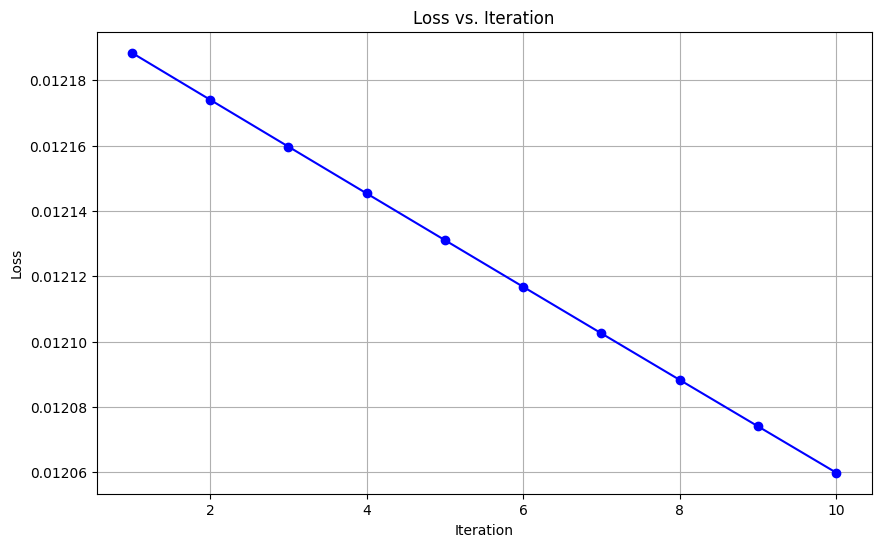

In [24]:
import matplotlib.pyplot as plt

# Provided data
data = """
Iteration 10, Loss: 0.012059810103336987, Parameter: -0.2271993399965508
Iteration 9, Loss: 0.012074012094280648, Parameter: -0.22707874189561716
Iteration 8, Loss: 0.012088237304738103, Parameter: -0.2269580017747741
Iteration 7, Loss: 0.012102485758242576, Parameter: -0.22683711940182646
Iteration 6, Loss: 0.012116757478209356, Parameter: -0.22671609454434377
Iteration 5, Loss: 0.012131052487934432, Parameter: -0.2265949269696614
Iteration 4, Loss: 0.01214537081059321, Parameter: -0.22647361644488181
Iteration 3, Loss: 0.012159712469239099, Parameter: -0.2263521627368756
Iteration 2, Loss: 0.012174077486802295, Parameter: -0.22623056561228297
Iteration 1, Loss: 0.012188465886088259, Parameter: -0.22610882483751468
"""

# Parse the data
iterations = []
loss_values = []

for line in data.strip().split("\n"):
    parts = line.split(", ")
    iteration = int(parts[0].split()[1])
    loss = float(parts[1].split()[1])
    iterations.append(iteration)
    loss_values.append(loss)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(iterations, loss_values, marker='o', linestyle='-', color='b')
plt.title('Loss vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()





In [26]:
num_qubits = 6
dev = qml.device("default.qubit", wires=num_qubits)
@qml.qnode(dev)
def variational_circuit1(params, num_layers, variable_values):

    # feature maps
    for i, value in enumerate(variable_values):
        qml.RY(2 * np.arccos(np.clip(value, -1, 1)), wires=i)

    # paramterized variational circuits
    for layer in range(num_layers):
        for i in range(len(variable_values)):
            qml.RZ(params[layer, i, 0], wires=i)
            qml.RX(params[layer, i, 1], wires=i)
        for i in range(len(variable_values) - 1):
            qml.CNOT(wires=[i, i + 1])

    
    return [qml.expval(qml.PauliZ(i)) for i in range(len(variable_values))]
global fn_values        
# Function to calculate the cost fucntion
def cost_fn1(params, num_layers, variable_values):
    fn_values =[] 
    total_cost = 0
    num_iterations = variable_values.shape[1] if len(variable_values.shape) > 1 else variable_values.shape[0]
    for i in range(num_iterations):
        selected_values = variable_values[:, i] if len(variable_values.shape) > 1 else variable_values
        outputs = variational_circuit1(params, num_layers, selected_values)
        fn_values.append(outputs)
        print(outputs,'      ',selected_values)
        cost = np.sum(outputs)
        total_cost += cost
    return fn_values

num_layers = 4
params = np.full((num_layers, num_qubits, 2), -0.2271993399965508)

# To choose variables to encode
chosen_variables = input(f"Choose the variables to encode from the list {variable_names} (comma-separated): ")
chosen_variables = [v.strip() for v in chosen_variables.split(',')]
selected_values = np.concatenate([variable_values[v] for v in chosen_variables], axis=0)

# To reshape
selected_values = selected_values.reshape(1, -1)
total_cost1 = cost_fn1(params, num_layers, selected_values)
print(f"Total cost = {total_cost1}")
# print(params)


[tensor(0.63919512, requires_grad=True)]        [-1.]
[tensor(0.57941581, requires_grad=True)]        [-0.998]
[tensor(0.55186574, requires_grad=True)]        [-0.996]
[tensor(0.52968173, requires_grad=True)]        [-0.994]
[tensor(0.51030164, requires_grad=True)]        [-0.992]
[tensor(0.49273035, requires_grad=True)]        [-0.99]
[tensor(0.47645614, requires_grad=True)]        [-0.988]
[tensor(0.46117426, requires_grad=True)]        [-0.986]
[tensor(0.44668563, requires_grad=True)]        [-0.984]
[tensor(0.43285161, requires_grad=True)]        [-0.982]
[tensor(0.41957101, requires_grad=True)]        [-0.98]
[tensor(0.40676724, requires_grad=True)]        [-0.978]
[tensor(0.39438064, requires_grad=True)]        [-0.976]
[tensor(0.38236366, requires_grad=True)]        [-0.974]
[tensor(0.37067763, requires_grad=True)]        [-0.972]
[tensor(0.35929061, requires_grad=True)]        [-0.97]
[tensor(0.34817585, requires_grad=True)]        [-0.968]
[tensor(0.33731064, requires_grad=Tru

In [27]:
extracted_values = [value[0].item() for value in total_cost1]

# Print extracted values
for i, value in enumerate(extracted_values):
    print(f"Value {i+1}: {value}")

Value 1: 0.6391951167275192
Value 2: 0.5794158059054179
Value 3: 0.5518657439407475
Value 4: 0.529681727588609
Value 5: 0.5103016405918825
Value 6: 0.49273034797895005
Value 7: 0.4764561435721973
Value 8: 0.4611742648906009
Value 9: 0.44668563308910153
Value 10: 0.4328516143329541
Value 11: 0.419571012914292
Value 12: 0.4067672397667259
Value 13: 0.3943806414044157
Value 14: 0.38236365784760157
Value 15: 0.37067762952374006
Value 16: 0.35929061429896086
Value 17: 0.34817584928120116
Value 18: 0.3373106386968809
Value 19: 0.3266755317853044
Value 20: 0.3162537032226723
Value 21: 0.30603047818088674
Value 22: 0.2959929627344161
Value 23: 0.286129752356794
Value 24: 0.2764306992161933
Value 25: 0.2668867243740568
Value 26: 0.25748966471548146
Value 27: 0.24823214705769953
Value 28: 0.23910748375251045
Value 29: 0.23010958545334076
Value 30: 0.22123288771285576
Value 31: 0.21247228881704844
Value 32: 0.20382309681844435
Value 33: 0.1952809841541584
Value 34: 0.1868419485593722
Value 35: 0.

In [28]:

new =[]
for i in range(1001):
    print(extracted_values[i])
    new.append(extracted_values[i])




0.6391951167275192
0.5794158059054179
0.5518657439407475
0.529681727588609
0.5103016405918825
0.49273034797895005
0.4764561435721973
0.4611742648906009
0.44668563308910153
0.4328516143329541
0.419571012914292
0.4067672397667259
0.3943806414044157
0.38236365784760157
0.37067762952374006
0.35929061429896086
0.34817584928120116
0.3373106386968809
0.3266755317853044
0.3162537032226723
0.30603047818088674
0.2959929627344161
0.286129752356794
0.2764306992161933
0.2668867243740568
0.25748966471548146
0.24823214705769953
0.23910748375251045
0.23010958545334076
0.22123288771285576
0.21247228881704844
0.20382309681844435
0.1952809841541584
0.1868419485593722
0.17850227923838768
0.1702585274519846
0.16210748083461146
0.1540461408777304
0.14607170311376239
0.13818153961399382
0.13037318347764537
0.12264431504129208
0.11499274958036215
0.1074164263094658
0.0999133985172227
0.09248182469535127
0.08511996054182369
0.0778261517347486
0.07059882738777029
0.06343649410979957
0.05633773060196701
0.049301

In [29]:
target_key = 'x'

# Initialize an empty list to store values
new_x = []

# Iterate through variable_data
for key, values in variable_data:
    if key == target_key:
        new_x = values
        break  # Stop iterating once the key is found

print(new_x)

[-1.0, -0.998, -0.996, -0.994, -0.992, -0.99, -0.988, -0.986, -0.984, -0.982, -0.98, -0.978, -0.976, -0.974, -0.972, -0.97, -0.968, -0.966, -0.964, -0.962, -0.96, -0.958, -0.956, -0.954, -0.952, -0.95, -0.948, -0.946, -0.944, -0.942, -0.94, -0.938, -0.9359999999999999, -0.9339999999999999, -0.9319999999999999, -0.9299999999999999, -0.9279999999999999, -0.926, -0.924, -0.922, -0.92, -0.918, -0.916, -0.914, -0.912, -0.91, -0.908, -0.906, -0.904, -0.902, -0.9, -0.898, -0.896, -0.894, -0.892, -0.89, -0.888, -0.886, -0.884, -0.882, -0.88, -0.878, -0.876, -0.874, -0.872, -0.87, -0.868, -0.866, -0.864, -0.862, -0.86, -0.858, -0.856, -0.854, -0.852, -0.85, -0.848, -0.846, -0.844, -0.842, -0.84, -0.838, -0.836, -0.834, -0.832, -0.83, -0.828, -0.826, -0.8240000000000001, -0.8220000000000001, -0.8200000000000001, -0.8180000000000001, -0.8160000000000001, -0.8140000000000001, -0.812, -0.81, -0.808, -0.806, -0.804, -0.802, -0.8, -0.798, -0.796, -0.794, -0.792, -0.79, -0.788, -0.786, -0.784, -0.782,

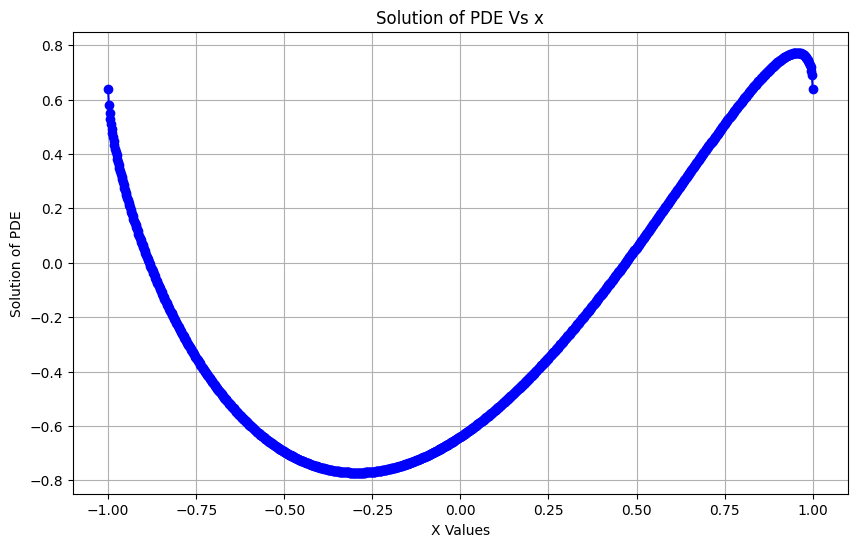

1001
1001


In [30]:
import matplotlib.pyplot as plt

# Data
y_values = new
x_values = new_x


plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b')
plt.title('Solution of PDE Vs x')
plt.xlabel('X Values')
plt.ylabel('Solution of PDE')
plt.grid(True)
plt.show()
print(len(x_values))
print(len(y_values))

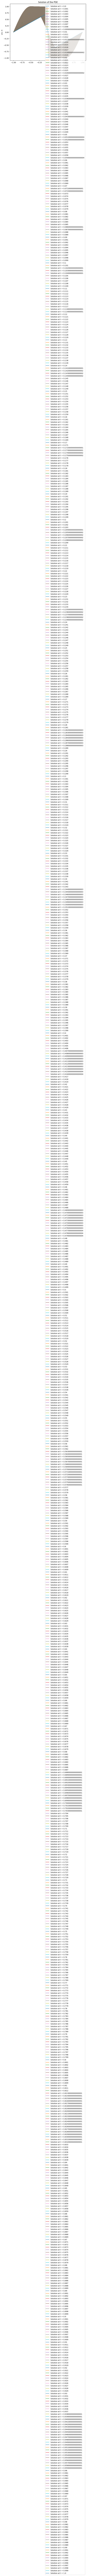

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid parameters
Nx = int(1 / 0.002 + 1)  # Number of grid points in x
Nt = int(1 / 0.001 + 1)  # Number of grid points in t
x = np.linspace(-1, 1, Nx)  # x-grid
t = np.linspace(0, 1, Nt)  # t-grid
dx = x[1] - x[0]  # Grid size in x
dt = t[1] - t[0]  # Grid size in t

# Initialize the solution array
u = np.zeros((Nx, Nt))
u[:, 0] = -np.sin(np.pi * x)  # Initial condition

# Define the PDE parameters
alpha = 0.01 / np.pi  # PDE parameter

# Finite difference discretization
for j in range(Nt - 1):
    for i in range(1, Nx - 1):
        u[i, j + 1] = u[i, j] - dt * u[i, j] * (u[i + 1, j] - u[i - 1, j]) / (2 * dx) + dt * alpha * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) / (dx ** 2)

# Apply boundary conditions
u[0, :] = 0  # Left boundary
u[-1, :] = 0  # Right boundary

# Plot the solution
plt.figure(figsize=(8, 6))
for j in range(Nt):
    plt.plot(x, u[:, j], label=f'Solution at t = {t[j]}')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('Solution of the PDE')
plt.legend()
plt.show()
